In [27]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
from sympy import *
from IPython.display import display, Latex
import ease_of_live_scripts as es
from scipy import optimize as fit
from pprint import *
import seaborn as sbs




In [28]:
plt.rcParams["mathtext.fontset"]='cm'
plt.rcParams['axes.labelsize']= 20
plt.rcParams['figure.dpi'] = 300
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
plt.rcParams['figure.facecolor'] = 'white'
sbs.set_style('whitegrid')

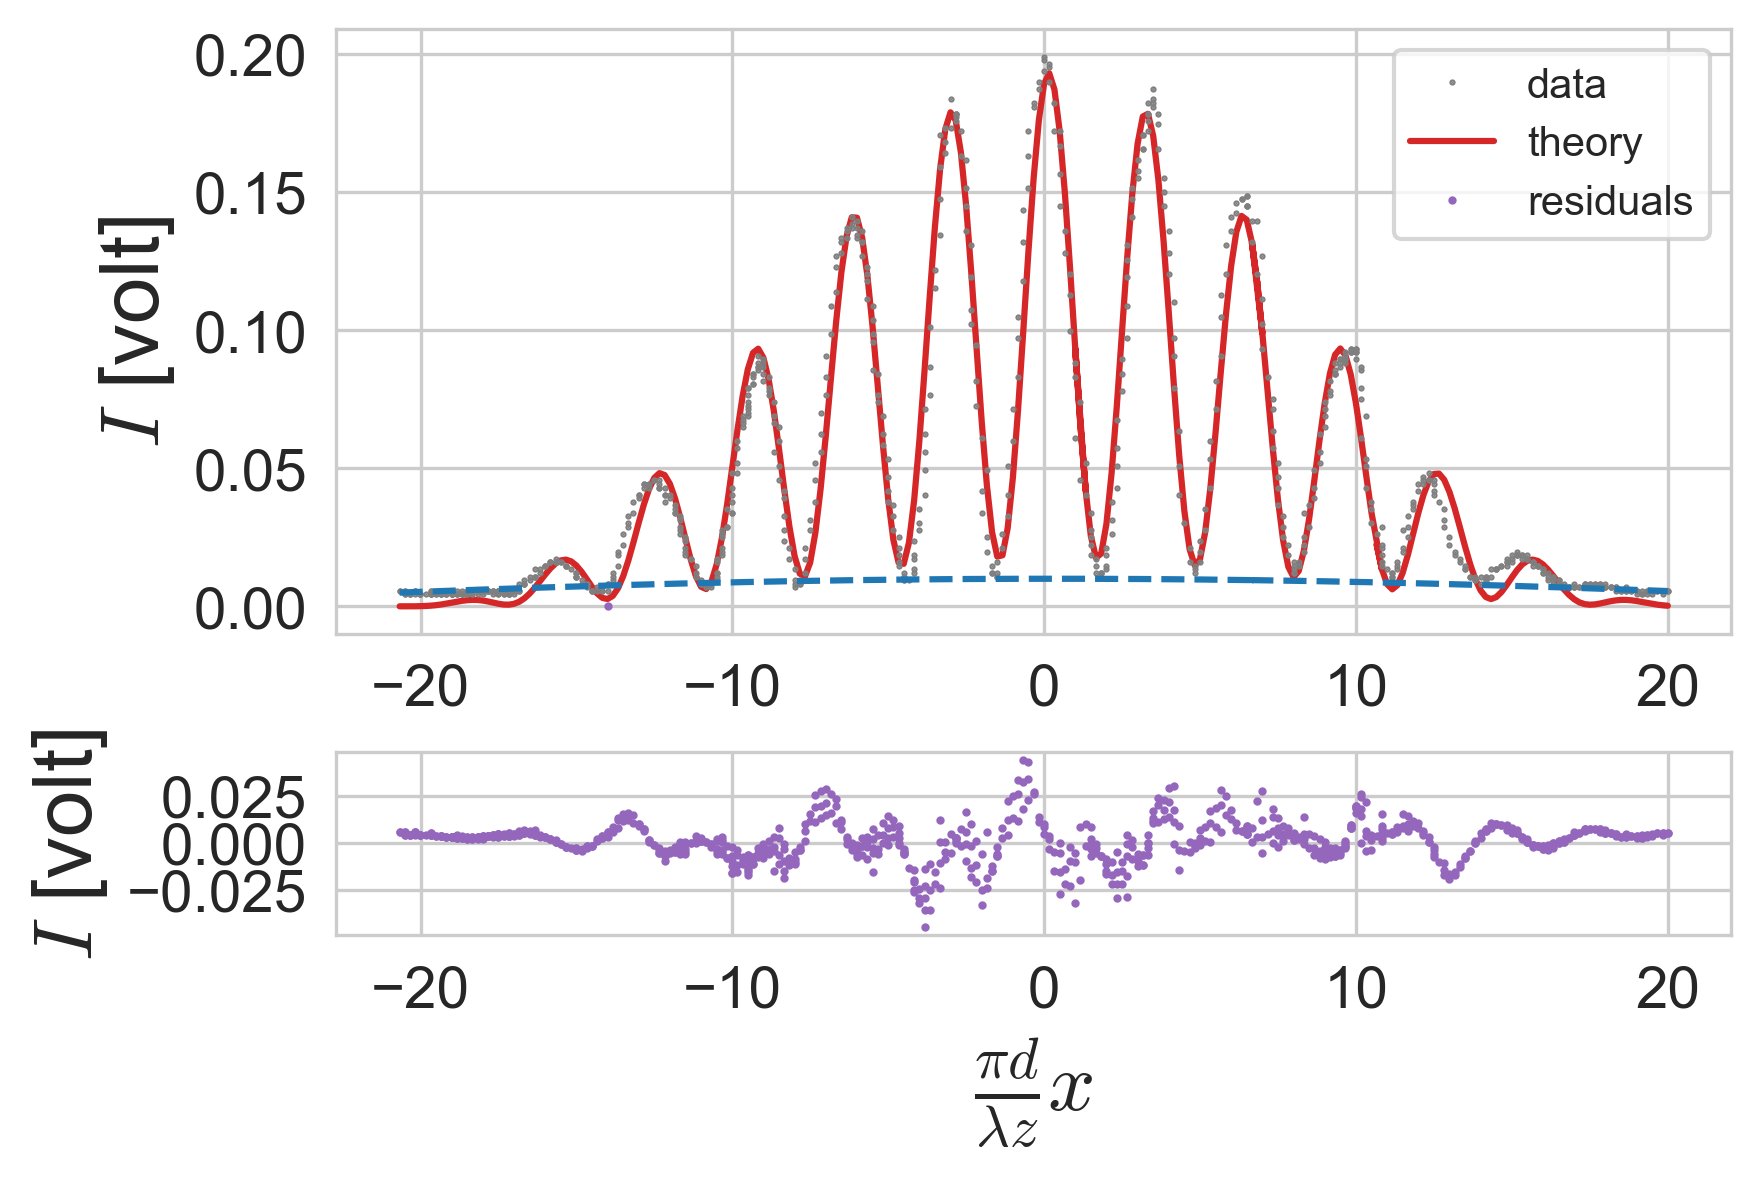

s:1.0118916035725602
p1:0.15147825944982135
p2:0.1089292017408409
offset:6.318177485661085
R^2:0.9596797450761109
Avg0.0011033933214462544
sigma0.010329731615468178


In [29]:
def model_integrate(xdata,model,s,p1,p2,of):
    ydata=np.zeros(len(xdata))
    for i in range(len(xdata)):
        for j in np.linspace(xdata[i]-s,xdata[i],100):
            ydata[i]+=model(j,p1,p2,of)/100
    return ydata

def newmodel(x,s,p1,p2,of):
    return model_integrate(x,es.double_slit_model,s,p1,p2,of)
def modelder(x,y):
    ydata=np.zeros(len(xdata))
    for i in range(len(x)-1):
        ydata[i]=(y[int(i+1)]-y[i])/(100*(x[int(i+1)]-x[i]))
    return np.average(ydata)

pname=['s' ,'p1', 'p2', 'offset']
z=0.855
wl=(6.328*(10**(-7)))
d=4.0e-5
L=25.0e-5
A=20
t=0.01
offset = es.offset+6.5
s = (np.pi*L/(wl*z))*0.05*0.001
a = (np.pi*L/(wl*z))
p1=d/L
p2=wl*z/(4*A*(L**2))
data=es.read('exp1125/original parameters/double slit/0.04w 0.25s slit not centered symmeyricly','sweep1.txt')
r,c=[400,1950]
xdata=z*np.tan(np.deg2rad((es.volt_to_angle(data['angle']))[int(c-r):int(c+r)]))
xdata2=(np.pi*L/(wl*z))*xdata
ydata=-data['power'][int(c-r):int(c+r)]
gs = gridspec.GridSpec(2, 1, height_ratios=[3.3, 1])
gs.update(hspace=0.3)
plt.subplots()
plt.subplot(gs[0])
vmax=np.where(ydata==max(ydata))
x=xdata2[vmax]
plt.plot(xdata2-x,ydata,'.',markersize=1,zorder=2,color=sbs.color_palette()[7])
popt, pcov=fit.curve_fit(newmodel,xdata2,ydata,[s, p1, p2 , offset],
                         bounds=((0,0      ,0     ,-np.inf),
                                 (np.inf,np.inf,np.inf,np.inf)))
plt.plot(xdata2-x,newmodel(xdata2,*popt),zorder=1,color=sbs.color_palette()[3])
plt.plot(-14,0,'.',markersize=2,zorder=2,color=sbs.color_palette()[4])
plt.legend(['data','theory','residuals'])
plt.ylabel(r'$I$ [volt]')
plt.plot(xdata2-x,t*np.cos((xdata2-7)*0.05),linestyle='dashed')
plt.subplot(gs[1])
plt.plot(xdata2-x,ydata-newmodel(xdata2,*popt),'.',markersize=2,zorder=2,color=sbs.color_palette()[4])
plt.xlabel(r'$\frac{\pi d}{\lambda z}x$')
plt.ylabel(r'$I$ [volt]')
plt.show()
for i in range(len(popt)): print(pname[i]+':'+str(popt[i]))
print('R^2:'+str(es.Rsquared(xdata2,ydata,newmodel,popt)))
Avg=np.average(ydata-newmodel(xdata2,*popt))
sigma=np.std(ydata-newmodel(xdata2,*popt))
print('Avg'+str(Avg))
print('sigma'+str(sigma))


'double slit interference 0.08mm spaced 0.5mm'

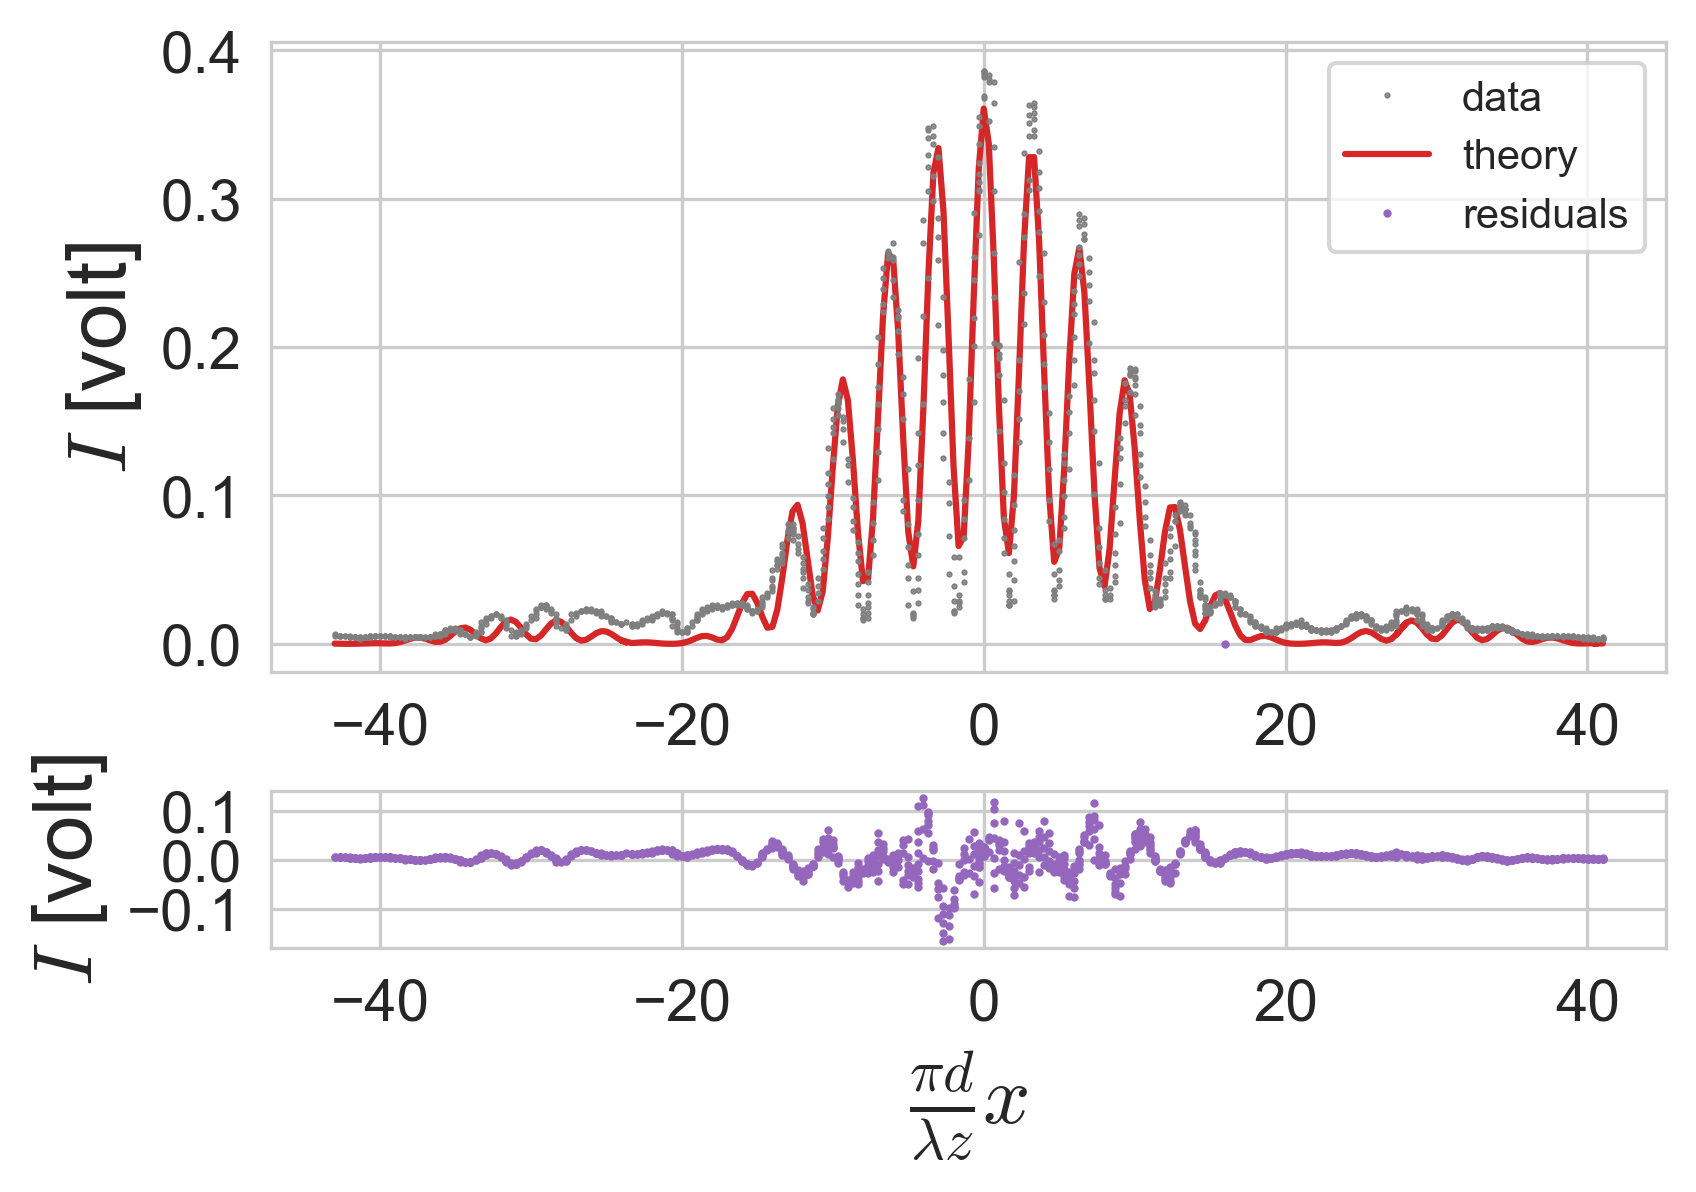

s:1.3760575694218975
p1:0.1494310352071933
p2:0.05272394735861038
offset:13.041338781824619
R^2:0.9043461805698785
Avg0.0047185781519698804
sigma0.026972755576100505


In [40]:
z=0.855
wl=(6.328*(10**(-7)))
d=8.0e-5
L=50.0e-5
A=10
offset = es.offset+15
s = (np.pi*L/(wl*z))*0.001*0.05
a = (np.pi*L/(wl*z))
p1=d/L
p2=wl*z/(4*A*(L**2))

data=es.read('exp1125/original parameters/double slit/0.08w 0.5s','sweep1.txt')
r,c=[600,1950]
xdata=z*np.tan(np.deg2rad((es.volt_to_angle(data['angle']))[int(c-r):int(c+r)]))
xdata2=(np.pi*L/(wl*z))*xdata
ydata=-data['power'][int(c-r):int(c+r)]
gs = gridspec.GridSpec(2, 1, height_ratios=[4, 1])
gs.update(hspace=0.3)
plt.subplots()
plt.subplot(gs[0])
vmax=np.where(ydata==max(ydata))
x=xdata2[vmax[0][0]]
plt.plot(xdata2-x,ydata,'.',markersize=1,zorder=2,color=sbs.color_palette()[7])
popt, pcov=fit.curve_fit(newmodel,xdata2,ydata,[s, p1, p2 , offset],
                         bounds=((0,0      ,0     ,-np.inf),
                                 ( np.inf,np.inf,np.inf,np.inf)))
plt.plot(xdata2-x,newmodel(xdata2,*popt),zorder=1,color=sbs.color_palette()[3])
plt.plot(16,0,'.',markersize=2,zorder=2,color=sbs.color_palette()[4])
plt.legend(['data','theory','residuals'])
display('double slit interference 0.08mm spaced 0.5mm')
plt.ylabel(r'$I$ [volt]')
plt.subplot(gs[1])
plt.plot(xdata2-x,ydata-newmodel(xdata2,*popt),'.',markersize=2,zorder=2,color=sbs.color_palette()[4])
plt.xlabel(r'$\frac{\pi d}{\lambda z}x$')
plt.ylabel(r'$I$ [volt]')
plt.show()
for i in range(len(popt)): print(pname[i]+':'+str(popt[i]))
print('R^2:'+str(es.Rsquared(xdata2,ydata,newmodel,popt)))
Avg=np.average(ydata-newmodel(xdata2,*popt))
sigma=np.std(ydata-newmodel(xdata2,*popt))
print('Avg'+str(Avg))
print('sigma'+str(sigma))

'double slit interference 0.08mm spaced 0.25mm'

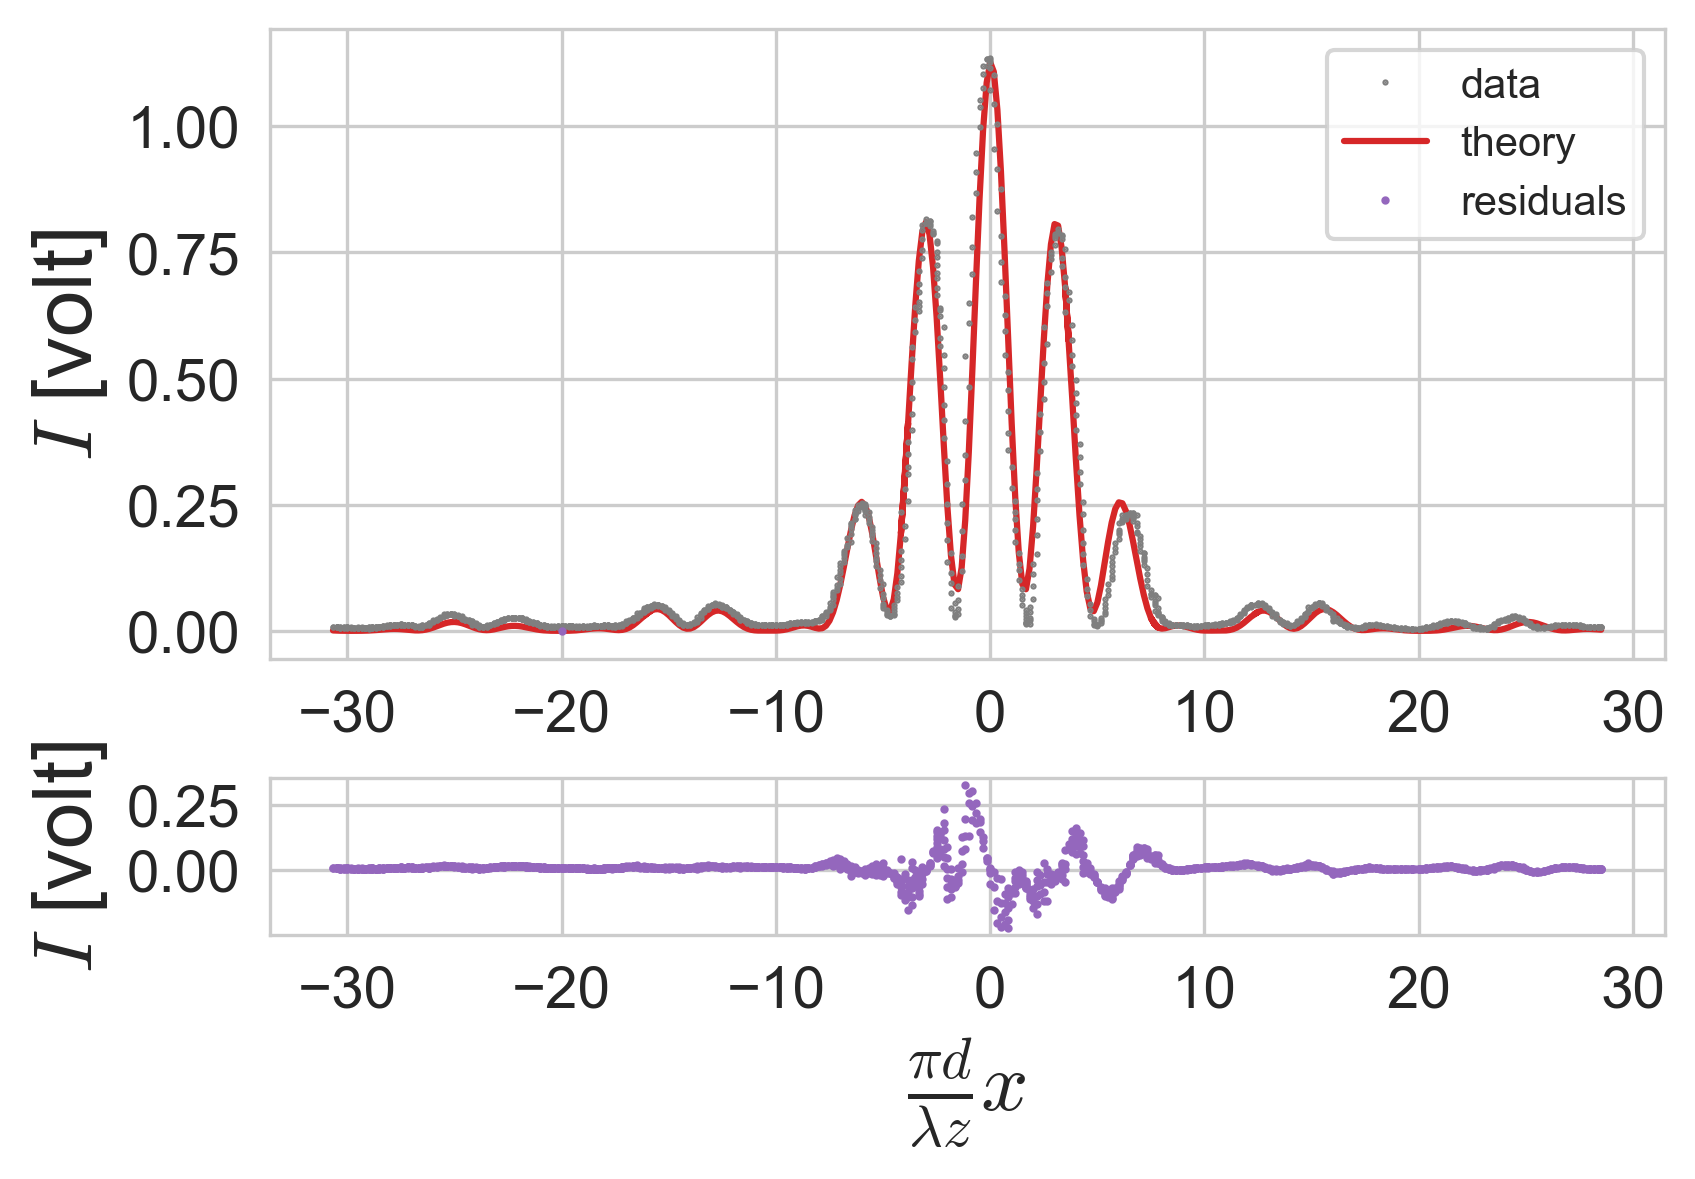

s:0.9394764518209388
p1:0.3166306766492879
p2:0.08234972100650509
offset:6.402893744710314
R^2:0.9587498192494037
Avg0.0065793976149897335
sigma0.04124117470534699


In [41]:
z=0.855
wl=(6.328*(10**(-7)))
d=8.0e-5
L=25.0e-5
A=10
offset = es.offset+6.1
s = (np.pi*L/(wl*z))*0.001*0.05
a = (np.pi*L/(wl*z))
p1=d/L
p2=wl*z/(4*A*(L**2))


data=es.read('exp1125/original parameters/double slit/0.08w 0.25s','sweep1.txt')
r,c=[800,1950]
xdata=z*np.tan(np.deg2rad((es.volt_to_angle(data['angle']))[int(c-r):int(c+r)]))
xdata2=(np.pi*L/(wl*z))*xdata
ydata=-data['power'][int(c-r):int(c+r)]
gs = gridspec.GridSpec(2, 1, height_ratios=[4, 1])
gs.update(hspace=0.3)
plt.subplots()
plt.subplot(gs[0])
vmax=np.where(ydata==max(ydata))
x=xdata2[vmax]
plt.plot(xdata2-x,ydata,'.',markersize=1,zorder=2,color=sbs.color_palette()[7])
popt, pcov=fit.curve_fit(newmodel,xdata2,ydata,[s, p1, p2 , offset],
                         bounds=((0,0      ,0     ,-np.inf),
                                 ( 2,np.inf,np.inf,np.inf)))
plt.plot(xdata2-x,newmodel(xdata2,*popt),zorder=1,color=sbs.color_palette()[3])
plt.plot(-20,0,'.',markersize=2,zorder=2,color=sbs.color_palette()[4])
plt.legend(['data','theory','residuals'])
display('double slit interference 0.08mm spaced 0.25mm')
plt.ylabel(r'$I$ [volt]')
plt.subplot(gs[1])
plt.plot(xdata2-x,ydata-newmodel(xdata2,*popt),'.',markersize=2,zorder=2,color=sbs.color_palette()[4])
plt.xlabel(r'$\frac{\pi d}{\lambda z}x$')
plt.ylabel(r'$I$ [volt]')
plt.show()
for i in range(len(popt)): print(pname[i]+':'+str(popt[i]))
print('R^2:'+str(es.Rsquared(xdata2,ydata,newmodel,popt)))
Avg=np.average(ydata-newmodel(xdata2,*popt))
sigma=np.std(ydata-newmodel(xdata2,*popt))
print('Avg'+str(Avg))
print('sigma'+str(sigma))



In [ ]:
data=es.read('exp1125/original parameters/parameters','sensor noise with iris.txt')
xdata=data['time']
ydata=-data['power']
plt.plot(xdata,ydata,'.',markersize=1,zorder=2,color=sbs.color_palette()[7])
plt.legend(['data'])
plt.title('Error')
plt.xlabel(r'$\frac{\pi d}{\lambda z}x$')
plt.ylabel(r'$I$ [volt]')
plt.show()

'double slit interference 0.08mm spaced 0.25mm'

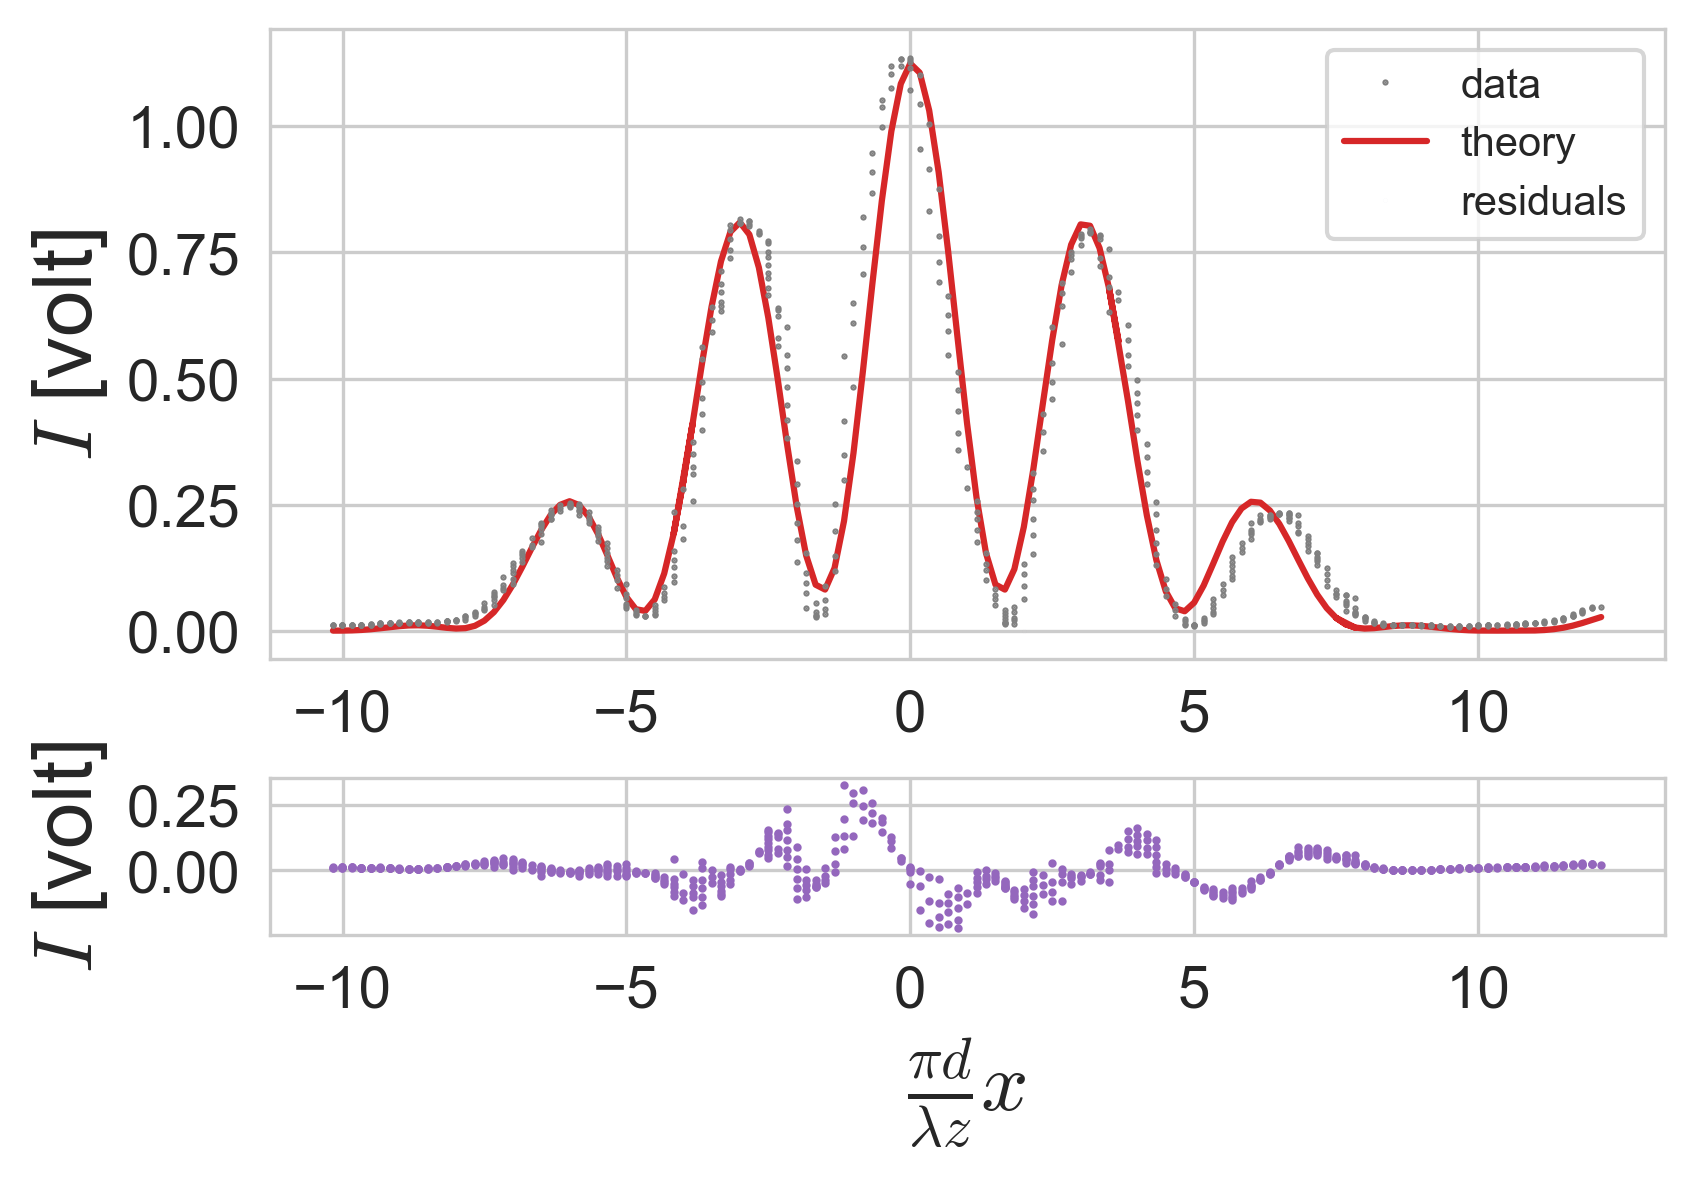

s:0.9363372045080522
p1:0.31602887726153284
p2:0.08223659306473306
offset:6.405085646712504
R^2:0.945901740646145
Avg0.0038455215052449437
sigma0.06689589770274322


In [42]:
z=0.855
wl=(6.328*(10**(-7)))
d=8.0e-5
L=25.0e-5
A=10
offset = es.offset+6.1
s = (np.pi*L/(wl*z))*0.001*0.05
a = (np.pi*L/(wl*z))
p1=d/L
p2=wl*z/(4*A*(L**2))



data=es.read('exp1125/original parameters/double slit/0.08w 0.25s','sweep1.txt')
r,c=[300,2100]
xdata=z*np.tan(np.deg2rad((es.volt_to_angle(data['angle']))[int(c-r):int(c+r)]))
xdata2=(np.pi*L/(wl*z))*xdata
ydata=-data['power'][int(c-r):int(c+r)]
gs = gridspec.GridSpec(2, 1, height_ratios=[4, 1])
gs.update(hspace=0.3)
plt.subplots()
plt.subplot(gs[0])
vmax=np.where(ydata==max(ydata))
x=xdata2[vmax]
plt.plot(xdata2-x,ydata,'.',markersize=1,zorder=2,color=sbs.color_palette()[7])
popt, pcov=fit.curve_fit(newmodel,xdata2,ydata,[s, p1, p2 , offset],
                         bounds=((0,0      ,0     ,-np.inf),
                                 ( 2,np.inf,np.inf,np.inf)))
plt.plot(xdata2-x,newmodel(xdata2,*popt),zorder=1,color=sbs.color_palette()[3])
plt.plot(2,0,'.',markersize=0.01,zorder=2,color=sbs.color_palette()[4])
plt.legend(['data','theory','residuals'])
display('double slit interference 0.08mm spaced 0.25mm')
plt.ylabel(r'$I$ [volt]')
plt.subplot(gs[1])
plt.plot(xdata2-x,ydata-newmodel(xdata2,*popt),'.',markersize=2,zorder=2,color=sbs.color_palette()[4])
plt.xlabel(r'$\frac{\pi d}{\lambda z}x$')
plt.ylabel(r'$I$ [volt]')
plt.show()
for i in range(len(popt)): print(pname[i]+':'+str(popt[i]))
print('R^2:'+str(es.Rsquared(xdata2,ydata,newmodel,popt)))
Avg=np.average(ydata-newmodel(xdata2,*popt))
sigma=np.std(ydata-newmodel(xdata2,*popt))
print('Avg'+str(Avg))
print('sigma'+str(sigma))

